### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
# Use pandas read_csv function to import the data
data = pd.read_csv('data/coupons.csv')

In [3]:
# Show the top rows to get a sense of the data in the dataset
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
# Look for missing data
missing_data = data.isnull().sum()
missing_data

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [5]:
# Investigate the different values. Age  should be: below 21, 21 to 25, 26 to 30, etc.
data["age"].value_counts()

21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64

In [22]:
# Investigate the different values. Car has some odd values in it. Do we want car vs. no car?
data["car"].value_counts()

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

In [6]:
# Investigate the different values. Coffee house visits
data["toCoupon_GEQ25min"].value_counts()

0    11173
1     1511
Name: toCoupon_GEQ25min, dtype: int64

In [7]:
# Investigate the different values. Bar visits
data["Bar"].value_counts()

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [8]:
# It seems that there is a lot of null values which I will drop
data = data.dropna()
missing_data = data.isnull().sum()
missing_data

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [9]:
# Investigate the different values as Yes vs. No to the coupon acceptance (boolean)
data["Y"].value_counts()

1    62
0    46
Name: Y, dtype: int64

In [10]:
# Calculate the proportion of people who chose to accept the coupon
# Assign a total of all coupon acceptance yes-values to its own variable  (7210)
accepted_coupons = data["Y"].sum()
accepted_coupons

# Assign a total of all data counts to its own variable  (12684)
total_coupons = data["coupon"].count()
total_coupons

# Store and display the ratio of total accepted coupons to those offered
proportion_accepted_coupons = accepted_coupons/total_coupons
proportion_accepted_coupons

0.5740740740740741

5. Use a bar plot to visualize the `coupon` column.

In [29]:
# Before we plot, let us review the different values in the coupon data column
data["coupon"].value_counts()

Coffee House             37
Restaurant(<20)          25
Carry out & Take away    19
Restaurant(20-50)        14
Bar                      13
Name: coupon, dtype: int64

In [28]:
# Let's show the seaborn barplot
seaborn_bar = sns.barplot(data, x="coupon", y="temperature", hue="Y")
seaborn_bar.set_xticklabels(seaborn_bar.get_xticklabels(), rotation=40, ha="right")
#data["temperature"].value_counts()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

6. Use a histogram to visualize the temperature column.

In [26]:
# Before we plot, let us review the different values in the temperature data column
data["temperature"].value_counts()

80    50
55    42
30    16
Name: temperature, dtype: int64

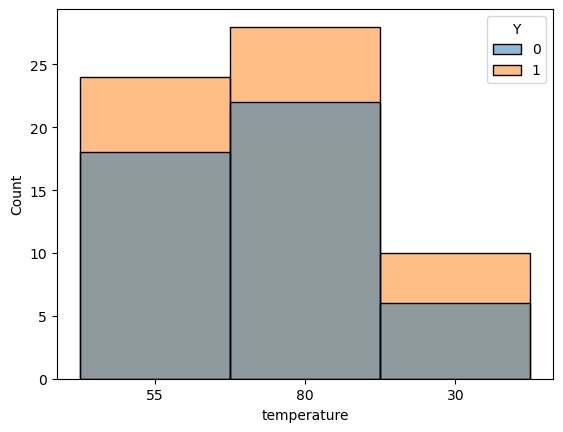

In [30]:
# Let's show the seaborn histogram
data["temperature"] = data["temperature"].astype(str)
seaborn_hist = sns.histplot(data, x='temperature', binwidth='150', hue='Y')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [17]:
# Create a new DataFrame with just the bar coupons
bar_coupons_df = data[data["coupon"] == "Bar"]
bar_coupons_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1239,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,1
1250,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,1,0,0
1254,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Single,...,4~8,4~8,1~3,never,1,1,1,0,1,0
2613,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,41,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,0
2617,Home,Alone,Sunny,55,6PM,Bar,1d,Female,41,Married partner,...,1~3,1~3,1~3,less1,1,0,0,1,0,0
2621,Work,Alone,Sunny,55,7AM,Bar,1d,Female,41,Married partner,...,1~3,1~3,1~3,less1,1,1,1,0,1,0
3101,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,26,Married partner,...,less1,1~3,1~3,less1,1,1,0,0,1,0
3105,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Married partner,...,less1,1~3,1~3,less1,1,0,0,1,0,0
3109,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Married partner,...,less1,1~3,1~3,less1,1,1,1,0,1,0
7313,No Urgent Place,Friend(s),Rainy,55,10PM,Bar,2h,Female,26,Single,...,less1,1~3,1~3,1~3,1,1,0,0,1,1


2. What proportion of bar coupons were accepted?


In [21]:
# Calculate the proportion of people who chose to accept the coupon
# Assign a total of all coupon acceptance yes-values to its own variable  (3)
accepted_bar_coupons = bar_coupons_df["Y"].sum()
accepted_bar_coupons

# Assign a total of all data counts to its own variable  (13)
total_bar_coupons = bar_coupons_df["coupon"].count()
total_bar_coupons

# Store and display the ratio of total accepted coupons to those offered
proportion_accepted_bar_coupons = accepted_bar_coupons/total_bar_coupons
proportion_accepted_bar_coupons

0.23076923076923078

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [34]:
# Create a new DataFrame with just the bar coupons and those who went to a bar 3 or fewer times a month
bar_coupons_df_3orless = bar_coupons_df[bar_coupons_df["Bar"].isin(["never", "less1", "1~3"])]
bar_coupons_df_3orless

# Create a new DataFrame with just the bar coupons and those who went to a bar more often than 3x a month
bar_coupons_df_4ormore = bar_coupons_df[bar_coupons_df["Bar"].isin(["4~8", "gt8"])]
bar_coupons_df_4ormore



,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
7313,No Urgent Place,Friend(s),Rainy,55,10PM,Bar,2h,Female,26,Single,...,less1,1~3,1~3,1~3,1,1,0,0,1,1
7321,Home,Alone,Sunny,80,6PM,Bar,2h,Female,26,Single,...,less1,1~3,1~3,1~3,1,0,0,1,0,1


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  